### USBL DATA PROCESSING

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(25,25)})
sns.set_context("paper")

In [2]:
# This notebook reads csv info extracted from bagfile topics
# To obtain the csvs desired files use usbldata_csv_extractor.py script execute by doing: 
# python usbldata_csv_extractor.py path_to_the_bagfile

# Once the csvs are extracted save them following this structure:
# Desired path + turbot + 
                           #  modem_delayed":"modem_delayed.csv
                           #  modem_raw":"modem_raw.csv
                           #  USBLlon":"USBLlon.csv
                           #  nav_status_turbot":"nav_status_tu.csv
                
# Desired path + xiroi + nav_status_xi.csv           



#Path to folder containing the robot files that contain the csvs
#Change this path and reexecute the notebook to obtain the results from a different bagfile:

path ='/home/uib/bagfiles/postprocessing_cat/csvs/grassmap/16_09/'

In [3]:
robots=["turbot","xiroi"]

csv_files={"modem_delayed":"modem_delayed.csv",
           "modem_raw":"modem_raw.csv",
           "USBLlon":"USBLlon.csv",
           "nav_status_turbot":"nav_status_tu.csv",
           "xiroi_setpoints":"xiroi_setpoints.csv",
           "nav_status_xiroi":"nav_status_xi.csv"}

#Creates dataframe, sets timestamp as index and resamples to 0.1S (averages data for each 0.1s so that there is only 10 measures for second)
#Resampling allows joining diferent dataframes from different topics
def create_df(csv_file,robot):
    df=pd.read_csv(path+robot+"/"+csv_files[csv_file],header=0,index_col=0)
    original_df=df.copy(deep=False)
    
    df=df.rename(columns={df.columns[0]:"stamp"})
    df['stamp'] = pd.to_datetime(df["stamp"], unit='ns')
    df = df.set_index('stamp')
    df=df.resample('0.1S').mean()
    return original_df,df
    

In [4]:
#Create topic dataframes:

robot="turbot"
print("---------------------------------------------------------------------------------------------------------------------------------------------------------")
print("TURBOT NAVIGATION")
turbot_nav_status_0,turbot_nav_status=create_df("nav_status_turbot",robot)
display(turbot_nav_status.head())
display(turbot_nav_status.tail())
display(turbot_nav_status.describe())
print("---------------------------------------------------------------------------------------------------------------------------------------------------------")
print("TURBOT USBLLONG")
USBLlon_0,USBLlon=create_df("USBLlon",robot)
display(USBLlon.head())
display(USBLlon.describe())
print("----------------------------------------------------------------------------------------------------------------------------------------------------------")
print("MODEM DELAYED")
modem_delayed_0,modem_delayed=create_df("modem_delayed",robot)
display(modem_delayed.head())
display(modem_delayed.describe())
print("----------------------------------------------------------------------------------------------------------------------------------------------------------")
print("MODEM RAW")
modem_raw_0,modem_raw=create_df("modem_raw",robot)
display(modem_raw.head())
display(modem_raw.describe())
print("----------------------------------------------------------------------------------------------------------------------------------------------------------")

robot="xiroi"
print("XIROI NAVIGATION")
xiroi_nav_status_0,xiroi_nav_status=create_df("nav_status_xiroi",robot)
display(xiroi_nav_status.head())
display(xiroi_nav_status.tail())
display(xiroi_nav_status.describe())
print("---------------------------------------------------------------------------------------------------------------------------------------------------------")

print("XIROI SETPOINTS")
xiroi_setpoints_0,xiroi_setpoints=create_df("xiroi_setpoints",robot)
display(xiroi_setpoints.head())
display(xiroi_setpoints.describe())
print("---------------------------------------------------------------------------------------------------------------------------------------------------------")

print("XIROI USBLLONG")
USBLlon_0_x,USBLlon_x=create_df("USBLlon",robot)
#display(USBLlon_0_x.head())
#USBLlon_0_x.describe()

---------------------------------------------------------------------------------------------------------------------------------------------------------
TURBOT NAVIGATION


,nav_status_D,nav_status_E,nav_status_N,nav_status_alt,nav_status_origin_lat,nav_status_origin_lon,nav_status_pitch,nav_status_roll,nav_status_yaw
stamp,,,,,,,,,
2021-09-16 15:27:11.600,-0.009576,-19.313475,-141.950659,30.007896,39.1546,2.9449,0.035787,-0.034139,-1.100062
2021-09-16 15:27:11.700,0.001884,-19.298306,-141.966760,30.078089,39.1546,2.9449,0.038840,-0.005909,-1.098133
2021-09-16 15:27:11.800,0.015720,-19.283048,-141.983314,30.067305,39.1546,2.9449,0.058293,0.022839,-1.097384
2021-09-16 15:27:11.900,0.041243,-19.307590,-141.946679,29.890928,39.1546,2.9449,0.076337,0.043391,-1.097563
2021-09-16 15:27:12.000,0.065203,-19.300104,-141.952154,29.880577,39.1546,2.9449,0.106484,0.062769,-1.096562


,nav_status_D,nav_status_E,nav_status_N,nav_status_alt,nav_status_origin_lat,nav_status_origin_lon,nav_status_pitch,nav_status_roll,nav_status_yaw
stamp,,,,,,,,,
2021-09-16 16:16:19.200,0.127526,-64.078045,-102.385358,32.979416,39.1546,2.9449,0.252354,0.073990,-2.296013
2021-09-16 16:16:19.300,0.123175,-64.086199,-102.361884,33.009401,39.1546,2.9449,0.246578,0.080401,-2.270606
2021-09-16 16:16:19.400,0.121286,-64.069847,-102.445827,33.039387,39.1546,2.9449,0.243119,0.079210,-2.249131
2021-09-16 16:16:19.500,0.124341,-64.072973,-102.420912,33.050198,39.1546,2.9449,0.242577,0.068268,-2.228152
2021-09-16 16:16:19.600,0.144616,-64.075246,-102.400515,33.072536,39.1546,2.9449,0.244259,0.056897,-2.213121


,nav_status_D,nav_status_E,nav_status_N,nav_status_alt,nav_status_origin_lat,nav_status_origin_lon,nav_status_pitch,nav_status_roll,nav_status_yaw
count,29481.000000,29481.000000,29481.000000,29481.000000,29481.0000,2.948100e+04,29481.000000,29481.000000,29481.000000
mean,24.814022,-46.401943,-115.279539,7.678710,39.1546,2.944900e+00,-0.003728,-0.056193,0.383457
std,8.992623,12.090256,11.930871,8.832600,0.0000,4.440967e-16,0.103162,0.049763,1.598052
min,-0.077728,-69.860169,-142.070866,2.936508,39.1546,2.944900e+00,-0.342232,-0.593333,-3.137712
25%,28.020747,-55.991295,-125.616750,3.377923,39.1546,2.944900e+00,-0.057546,-0.074940,-0.725189
50%,28.682849,-46.522047,-115.334039,3.498128,39.1546,2.944900e+00,-0.025815,-0.046552,-0.535785
75%,29.650147,-37.132297,-103.449655,3.642549,39.1546,2.944900e+00,0.021794,-0.030344,2.538344
max,30.626548,-18.327304,-95.174120,35.074242,39.1546,2.944900e+00,0.414850,0.403176,3.139919


---------------------------------------------------------------------------------------------------------------------------------------------------------
TURBOT USBLLONG


,usbllong_D,usbllong_E,usbllong_N,usbllong_X,usbllong_Y,usbllong_Z,usbllong_pitch,usbllong_roll,usbllong_yaw
stamp,,,,,,,,,
2021-09-16 15:28:37.500,-8.4524,62.994301,-6.8652,-60.380299,19.3209,-8.2328,-0.0075,0.012,-1.1507
2021-09-16 15:28:37.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-16 15:28:37.700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-16 15:28:37.800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-16 15:28:37.900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,usbllong_D,usbllong_E,usbllong_N,usbllong_X,usbllong_Y,usbllong_Z,usbllong_pitch,usbllong_roll,usbllong_yaw
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,24.322807,48.726978,5.467331,-37.228290,29.164222,22.334278,0.035444,0.017958,-1.052668
std,7.516687,9.297987,15.560359,11.528057,21.268106,7.797315,0.042132,0.050622,0.306883
min,-20.404499,24.719299,-53.388100,-60.380299,-38.449699,-19.165400,-0.092000,-0.125300,-2.011300
25%,25.021399,40.407200,-6.125250,-45.560400,11.639050,21.478200,0.007700,-0.015650,-1.205200
50%,26.744600,49.433701,5.344000,-39.739700,31.907301,24.411699,0.037400,0.018800,-1.006200
75%,27.762750,54.831900,15.883400,-30.557650,46.020350,26.559250,0.065500,0.051900,-0.839300
max,30.913601,67.559402,37.851700,1.262400,70.662697,35.483700,0.163000,0.145600,0.364400


----------------------------------------------------------------------------------------------------------------------------------------------------------
MODEM DELAYED


,modem_delayed_X,modem_delayed_Y,modem_delayed_Z,modem_delayed_ori_W,modem_delayed_ori_X,modem_delayed_ori_Y,modem_delayed_ori_Z
stamp,,,,,,,
2021-09-16 15:28:37.500,-104.099135,-39.75093,-7.6524,0.571452,0.0,0.0,-0.820635
2021-09-16 15:28:37.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-16 15:28:37.700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-16 15:28:37.800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-16 15:28:37.900,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,modem_delayed_X,modem_delayed_Y,modem_delayed_Z,modem_delayed_ori_W,modem_delayed_ori_X,modem_delayed_ori_Y,modem_delayed_ori_Z
count,571.000000,571.000000,571.000000,571.000000,571.0,571.0,571.000000
mean,-100.274000,-64.132778,25.122807,0.511607,0.0,0.0,-0.745655
std,10.763989,16.546498,7.516687,0.234141,0.0,0.0,0.357428
min,-166.580106,-96.946946,-19.604499,0.007517,0.0,0.0,-0.999972
25%,-107.458169,-78.785996,25.821399,0.347933,0.0,0.0,-0.932586
50%,-99.734954,-64.011209,27.544600,0.489871,0.0,0.0,-0.856310
75%,-92.652374,-52.078736,28.562750,0.725986,0.0,0.0,-0.664143
max,-75.867059,-26.807840,31.713601,0.994788,0.0,0.0,0.999887


----------------------------------------------------------------------------------------------------------------------------------------------------------
MODEM RAW


,modem_raw_X,modem_raw_Y,modem_raw_Z,modem_raw_ori_W,modem_raw_ori_X,modem_raw_ori_Y,modem_raw_ori_Z
stamp,,,,,,,
2021-09-16 15:28:38.400,-104.130226,-40.066278,-7.661947,0.765643,0.058346,0.034565,-0.639681
2021-09-16 15:28:38.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-16 15:28:38.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-16 15:28:38.700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-16 15:28:38.800,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,modem_raw_X,modem_raw_Y,modem_raw_Z,modem_raw_ori_W,modem_raw_ori_X,modem_raw_ori_Y,modem_raw_ori_Z
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,-100.432552,-67.561255,25.185877,0.604549,-0.014839,-0.004571,0.282910
std,9.549971,15.636052,7.534678,0.318588,0.032001,0.049703,0.671430
min,-126.496380,-96.947029,-11.369220,0.066894,-0.139981,-0.109609,-0.989840
25%,-107.367275,-81.174907,26.117060,0.287909,-0.027675,-0.028763,-0.286908
50%,-100.331154,-67.646529,27.615534,0.566764,-0.013724,-0.020976,0.493837
75%,-93.455019,-56.006175,28.551412,0.956673,-0.001562,-0.005081,0.957026
max,-79.422631,-27.190478,31.423400,0.997225,0.110830,0.181377,0.996988


----------------------------------------------------------------------------------------------------------------------------------------------------------
XIROI NAVIGATION


,nav_status_D,nav_status_E,nav_status_N,nav_status_alt,nav_status_origin_lat,nav_status_origin_lon,nav_status_pitch,nav_status_roll,nav_status_yaw
stamp,,,,,,,,,
2021-09-16 15:34:10.300,0.0,-89.415826,-143.378674,0.0,39.1546,2.9449,0.0,0.0,-1.697057
2021-09-16 15:34:10.400,0.0,-89.404189,-143.387905,0.0,39.1546,2.9449,0.0,0.0,-1.736080
2021-09-16 15:34:10.500,0.0,-89.397582,-143.394008,0.0,39.1546,2.9449,0.0,0.0,-1.746785
2021-09-16 15:34:10.600,0.0,-89.387479,-143.402396,0.0,39.1546,2.9449,0.0,0.0,-1.726314
2021-09-16 15:34:10.700,0.0,-89.390639,-143.396137,0.0,39.1546,2.9449,0.0,0.0,-1.729512


,nav_status_D,nav_status_E,nav_status_N,nav_status_alt,nav_status_origin_lat,nav_status_origin_lon,nav_status_pitch,nav_status_roll,nav_status_yaw
stamp,,,,,,,,,
2021-09-16 16:19:10.600,0.0,-54.203251,-125.509839,0.0,39.1546,2.9449,0.0,0.0,2.696437
2021-09-16 16:19:10.700,0.0,-54.187757,-125.509670,0.0,39.1546,2.9449,0.0,0.0,2.717227
2021-09-16 16:19:10.800,0.0,-54.162329,-125.520836,0.0,39.1546,2.9449,0.0,0.0,2.711783
2021-09-16 16:19:10.900,0.0,-54.144409,-125.523496,0.0,39.1546,2.9449,0.0,0.0,2.703990
2021-09-16 16:19:11.000,0.0,-54.121907,-125.529603,0.0,39.1546,2.9449,0.0,0.0,2.692518


,nav_status_D,nav_status_E,nav_status_N,nav_status_alt,nav_status_origin_lat,nav_status_origin_lon,nav_status_pitch,nav_status_roll,nav_status_yaw
count,26999.0,26999.000000,26999.000000,26999.0,2.699900e+04,2.699900e+04,26999.0,26999.0,26999.000000
mean,0.0,-85.996482,-140.574840,0.0,3.915460e+01,2.944900e+00,0.0,0.0,-1.508736
std,0.0,7.850842,4.862492,0.0,7.105559e-15,4.440974e-16,0.0,0.0,1.539823
min,0.0,-90.327487,-144.052404,0.0,3.915460e+01,2.944900e+00,0.0,0.0,-3.138838
25%,0.0,-89.762624,-143.307861,0.0,3.915460e+01,2.944900e+00,0.0,0.0,-2.398046
50%,0.0,-89.602103,-142.719135,0.0,3.915460e+01,2.944900e+00,0.0,0.0,-2.003603
75%,0.0,-85.433180,-140.742763,0.0,3.915460e+01,2.944900e+00,0.0,0.0,-1.302945
max,0.0,-54.121907,-125.492407,0.0,3.915460e+01,2.944900e+00,0.0,0.0,3.140624


---------------------------------------------------------------------------------------------------------------------------------------------------------
XIROI SETPOINTS


,setpoint_0,setpoint_1
stamp,,
2021-09-16 15:34:10.300,0.310933,-0.209902
2021-09-16 15:34:10.400,0.369670,-0.300718
2021-09-16 15:34:10.500,0.321928,-0.235667
2021-09-16 15:34:10.600,0.282520,-0.120781
2021-09-16 15:34:10.700,0.240559,0.044965


,setpoint_0,setpoint_1
count,26998.000000,26998.000000
mean,0.092419,0.020637
std,0.285558,0.238572
min,-0.720890,-0.803009
25%,-0.120267,-0.192724
50%,0.168601,0.039585
75%,0.216623,0.188585
max,0.911180,0.904509


---------------------------------------------------------------------------------------------------------------------------------------------------------
XIROI USBLLONG


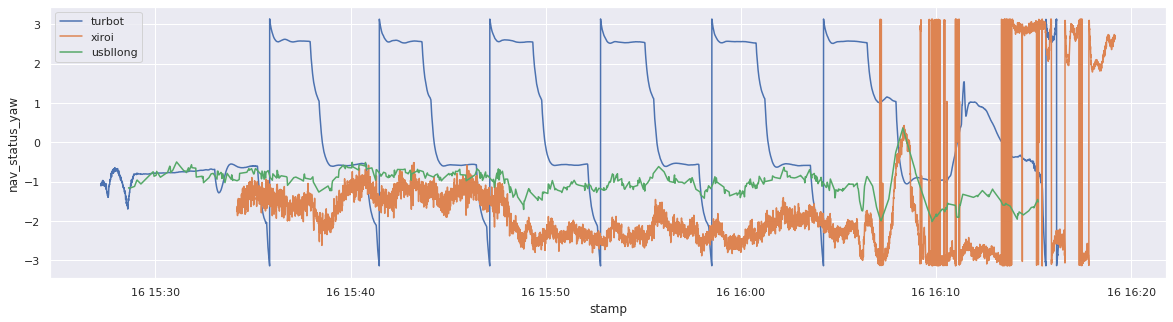

In [5]:
# Plot yaw
sns.set(rc={'figure.figsize':(20,5)})
fig, ax = plt.subplots()
sns.lineplot(data=turbot_nav_status,x="stamp", y="nav_status_yaw",ax=ax)
sns.lineplot(data=xiroi_nav_status,x="stamp", y="nav_status_yaw",ax=ax)
sns.lineplot(data=USBLlon.dropna(),x="stamp", y="usbllong_yaw",ax=ax)
plt.legend(["turbot","xiroi","usbllong"])
plt.show()
# The dataset from the xiroi navigation is shorter than the rest
# There is an offset rotation between the xiroi mag and the usbl mag. Let me unify datasets

In [6]:
#Create a unified dataframe:
nav = turbot_nav_status.join(xiroi_nav_status, lsuffix='_turbot', rsuffix='_xiroi').dropna()
nav=nav.join(USBLlon).dropna()
#nav=nav.join(modem_delayed).dropna()
nav=nav.join(modem_raw).dropna()
nav.head()

nav=nav.join(xiroi_setpoints).dropna()
nav.head()

,nav_status_D_turbot,nav_status_E_turbot,nav_status_N_turbot,nav_status_alt_turbot,nav_status_origin_lat_turbot,nav_status_origin_lon_turbot,nav_status_pitch_turbot,nav_status_roll_turbot,nav_status_yaw_turbot,nav_status_D_xiroi,...,usbllong_yaw,modem_raw_X,modem_raw_Y,modem_raw_Z,modem_raw_ori_W,modem_raw_ori_X,modem_raw_ori_Y,modem_raw_ori_Z,setpoint_0,setpoint_1
stamp,,,,,,,,,,,,,,,,,,,,,
2021-09-16 15:37:05.200,29.129019,-45.037387,-117.514936,3.294397,39.1546,2.9449,-0.028665,-0.051806,2.556607,0.0,...,-0.8957,-100.694437,-53.459847,27.234000,0.288590,0.006376,-0.028785,0.956999,-0.169756,0.174848
2021-09-16 15:37:28.600,28.767777,-41.133790,-123.291678,3.272889,39.1546,2.9449,0.002154,-0.050004,2.576749,0.0,...,-0.9465,-99.784127,-53.779876,24.656400,0.278584,-0.007791,-0.023596,0.960090,0.194720,-0.324008
2021-09-16 15:37:36.500,28.524175,-39.821945,-125.253749,3.369415,39.1546,2.9449,0.022865,-0.041668,2.575707,0.0,...,-0.8692,-109.982243,-49.068370,27.228667,0.278883,-0.016699,-0.016728,0.960034,-0.104477,0.181569
2021-09-16 15:37:38.000,28.515805,-39.582581,-125.620936,3.321869,39.1546,2.9449,0.018894,-0.071038,2.576167,0.0,...,-0.8022,-111.128710,-45.310980,26.418601,0.278450,-0.019056,-0.031377,0.959749,0.179422,0.168416
2021-09-16 15:37:40.800,28.463973,-39.126547,-126.321446,3.364609,39.1546,2.9449,0.017602,-0.050343,2.574649,0.0,...,-0.9095,-105.665919,-48.068640,23.824000,0.279355,-0.015528,-0.022143,0.959807,0.168527,-0.341718


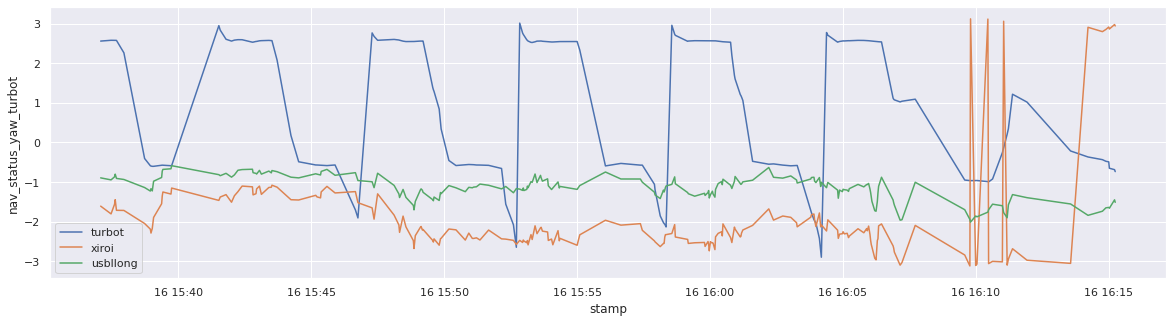

In [7]:
# Plot yaw again
fig, ax = plt.subplots()
sns.lineplot(data=nav,x="stamp", y="nav_status_yaw_turbot",ax=ax)
sns.lineplot(data=nav,x="stamp", y="nav_status_yaw_xiroi",ax=ax)
sns.lineplot(data=nav,x="stamp", y="usbllong_yaw",ax=ax)
plt.legend(["turbot","xiroi","usbllong"])
plt.show()

In [8]:
# Now get the mean yaw difference
yaw_diff = nav.nav_status_yaw_xiroi.mean() - nav.usbllong_yaw.mean()
print(yaw_diff*180/np.pi)

# We will assume that ther is a 90º rotation
nav['usbllong_yaw_corrected'] = nav['usbllong_yaw'] + np.pi/2

-44.510419249975364


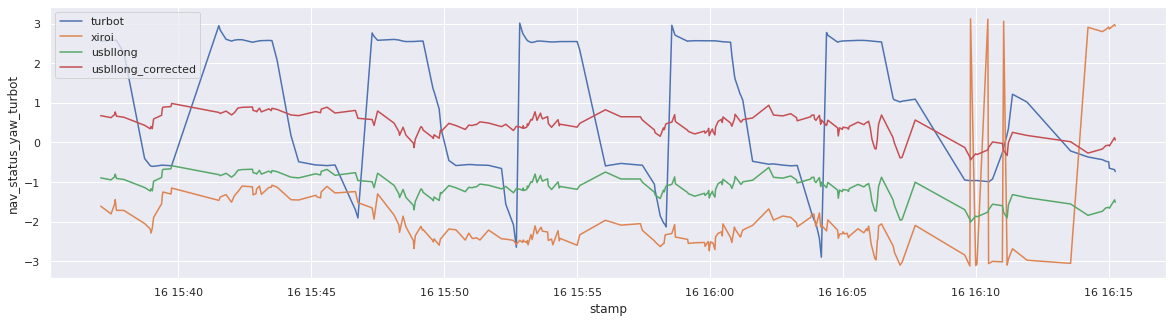

In [9]:
# Plot yaw again!!
fig, ax = plt.subplots()
sns.lineplot(data=nav,x="stamp", y="nav_status_yaw_turbot",ax=ax)
sns.lineplot(data=nav,x="stamp", y="nav_status_yaw_xiroi",ax=ax)
sns.lineplot(data=nav,x="stamp", y="usbllong_yaw",ax=ax)
sns.lineplot(data=nav,x="stamp", y="usbllong_yaw_corrected",ax=ax)
plt.legend(["turbot","xiroi","usbllong", "usbllong_corrected"])
plt.show()
# The differences are due to the use of different calibrations

In [10]:
# Lets transform the USBL measurements, use the following transformation matrix for the rotations
# x' = xcos(yaw) - ysin(yaw)
# y' = xsin(yaw) + cos(yaw)

# 1 - Xiroi + usbllong (mag xiroi)
usbllong_X_transf = nav['usbllong_X']*np.cos(nav["nav_status_yaw_xiroi"])-nav['usbllong_Y']*np.sin(nav["nav_status_yaw_xiroi"])
usbllong_Y_transf = nav['usbllong_X']*np.sin(nav["nav_status_yaw_xiroi"])+nav['usbllong_Y']*np.cos(nav["nav_status_yaw_xiroi"])
nav['p1_N'] = nav['nav_status_N_xiroi'] + usbllong_X_transf
nav['p1_E'] = nav['nav_status_E_xiroi'] + usbllong_Y_transf

# 2 - Xiroi + usbllong (mag usbl) Transform from ENU to NED (90º correction)
nav['p2_N'] = nav['nav_status_N_xiroi']-nav['usbllong_E']
nav['p2_E'] = nav['nav_status_E_xiroi']+nav['usbllong_N']


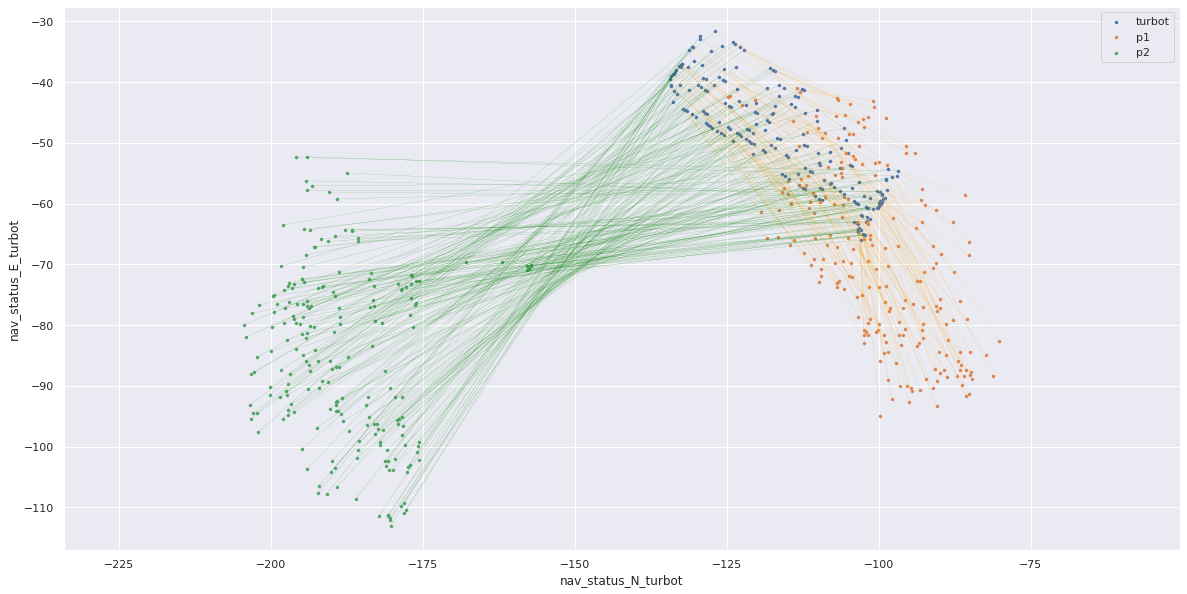

In [11]:
# Plot 
sns.set(rc={'figure.figsize':(20,10)})
fig, ax = plt.subplots()
sns.scatterplot(data=nav,x="nav_status_N_turbot", y="nav_status_E_turbot", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="p1_N", y="p1_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="p2_N", y="p2_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
plt.legend(["turbot","p1","p2","modem_raw"])
for index, row in nav.iterrows():
    plt.plot([row.nav_status_N_turbot, row.p1_N], [row.nav_status_E_turbot, row.p1_E], linewidth=0.1, c='orange')
for index, row in nav.iterrows():
    plt.plot([row.nav_status_N_turbot, row.p2_N], [row.nav_status_E_turbot, row.p2_E], linewidth=0.1, c='green')
plt.axis('equal')
plt.show()

In [12]:
# Compute error
N_error_p1 = np.abs(nav['nav_status_N_turbot']-nav['p1_N'])
E_error_p1 = np.abs(nav['nav_status_E_turbot']-nav['p1_E'])
nav['error_p1'] = np.sqrt(np.power(N_error_p1,2)+np.power(E_error_p1,2))

N_error_p2 = np.abs(nav['nav_status_N_turbot']-nav['p2_N'])
E_error_p2 = np.abs(nav['nav_status_E_turbot']-nav['p2_E'])
nav['error_p2'] = np.sqrt(np.power(N_error_p1,2)+np.power(E_error_p2,2))

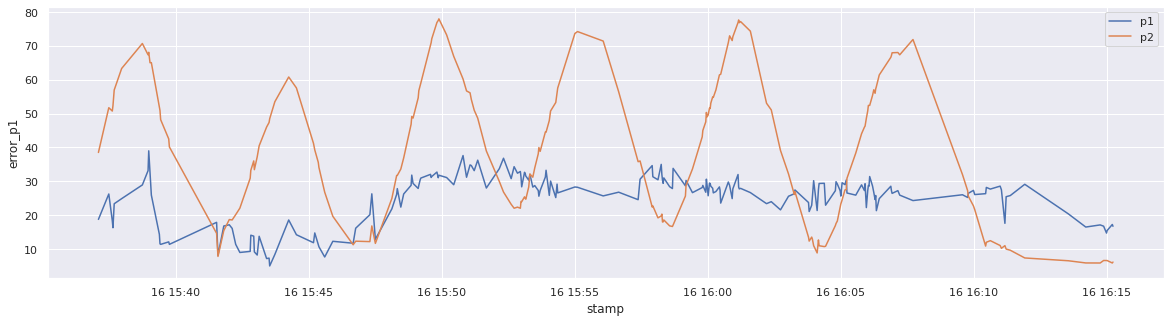

In [13]:
# Plot error 
sns.set(rc={'figure.figsize':(20,5)})
fig, ax = plt.subplots()
sns.lineplot(data=nav,x="stamp", y="error_p1",ax=ax)
sns.lineplot(data=nav,x="stamp", y="error_p2",ax=ax)
plt.legend(["p1","p2"])
plt.show()

In [14]:
# Compute acoustic distance 
E_dist = np.abs(nav['nav_status_E_turbot']-nav['nav_status_E_xiroi'])
N_dist = np.abs(nav['nav_status_N_turbot']-nav['nav_status_N_xiroi'])
D_dist = nav['nav_status_D_turbot']-nav['nav_status_D_xiroi']

nav['dist_2D']=np.sqrt(np.power(E_dist,2)+np.power(N_dist,2))
nav['dist_3D']=np.sqrt(np.power(nav['dist_2D'],2)+np.power(D_dist,2))

In [15]:
nav.head()

,nav_status_D_turbot,nav_status_E_turbot,nav_status_N_turbot,nav_status_alt_turbot,nav_status_origin_lat_turbot,nav_status_origin_lon_turbot,nav_status_pitch_turbot,nav_status_roll_turbot,nav_status_yaw_turbot,nav_status_D_xiroi,...,setpoint_1,usbllong_yaw_corrected,p1_N,p1_E,p2_N,p2_E,error_p1,error_p2,dist_2D,dist_3D
stamp,,,,,,,,,,,,,,,,,,,,,
2021-09-16 15:37:05.200,29.129019,-45.037387,-117.514936,3.294397,39.1546,2.9449,-0.028665,-0.051806,2.556607,0.0,...,0.174848,0.675096,-100.610775,-53.235798,-197.857627,-79.658578,18.787352,38.527620,51.617303,59.269264
2021-09-16 15:37:28.600,28.767777,-41.133790,-123.291678,3.272889,39.1546,2.9449,0.002154,-0.050004,2.576749,0.0,...,-0.324008,0.624296,-99.945799,-53.190320,-198.412361,-87.298523,26.275273,51.732123,52.470437,59.839216
2021-09-16 15:37:36.500,28.524175,-39.821945,-125.253749,3.369415,39.1546,2.9449,0.022865,-0.041668,2.575707,0.0,...,0.181569,0.701596,-109.435002,-49.205869,-196.991565,-88.041221,18.392683,50.747722,52.974355,60.165695
2021-09-16 15:37:38.000,28.515805,-39.582581,-125.620936,3.321869,39.1546,2.9449,0.018894,-0.071038,2.576167,0.0,...,0.168416,0.768596,-110.421417,-45.542326,-197.338527,-89.653095,16.326173,52.326682,52.967829,60.155981
2021-09-16 15:37:40.800,28.463973,-39.126547,-126.321446,3.364609,39.1546,2.9449,0.017602,-0.050343,2.574649,0.0,...,-0.341718,0.661296,-104.864238,-48.467916,-198.656533,-91.889405,23.402413,56.959029,53.443251,60.550630


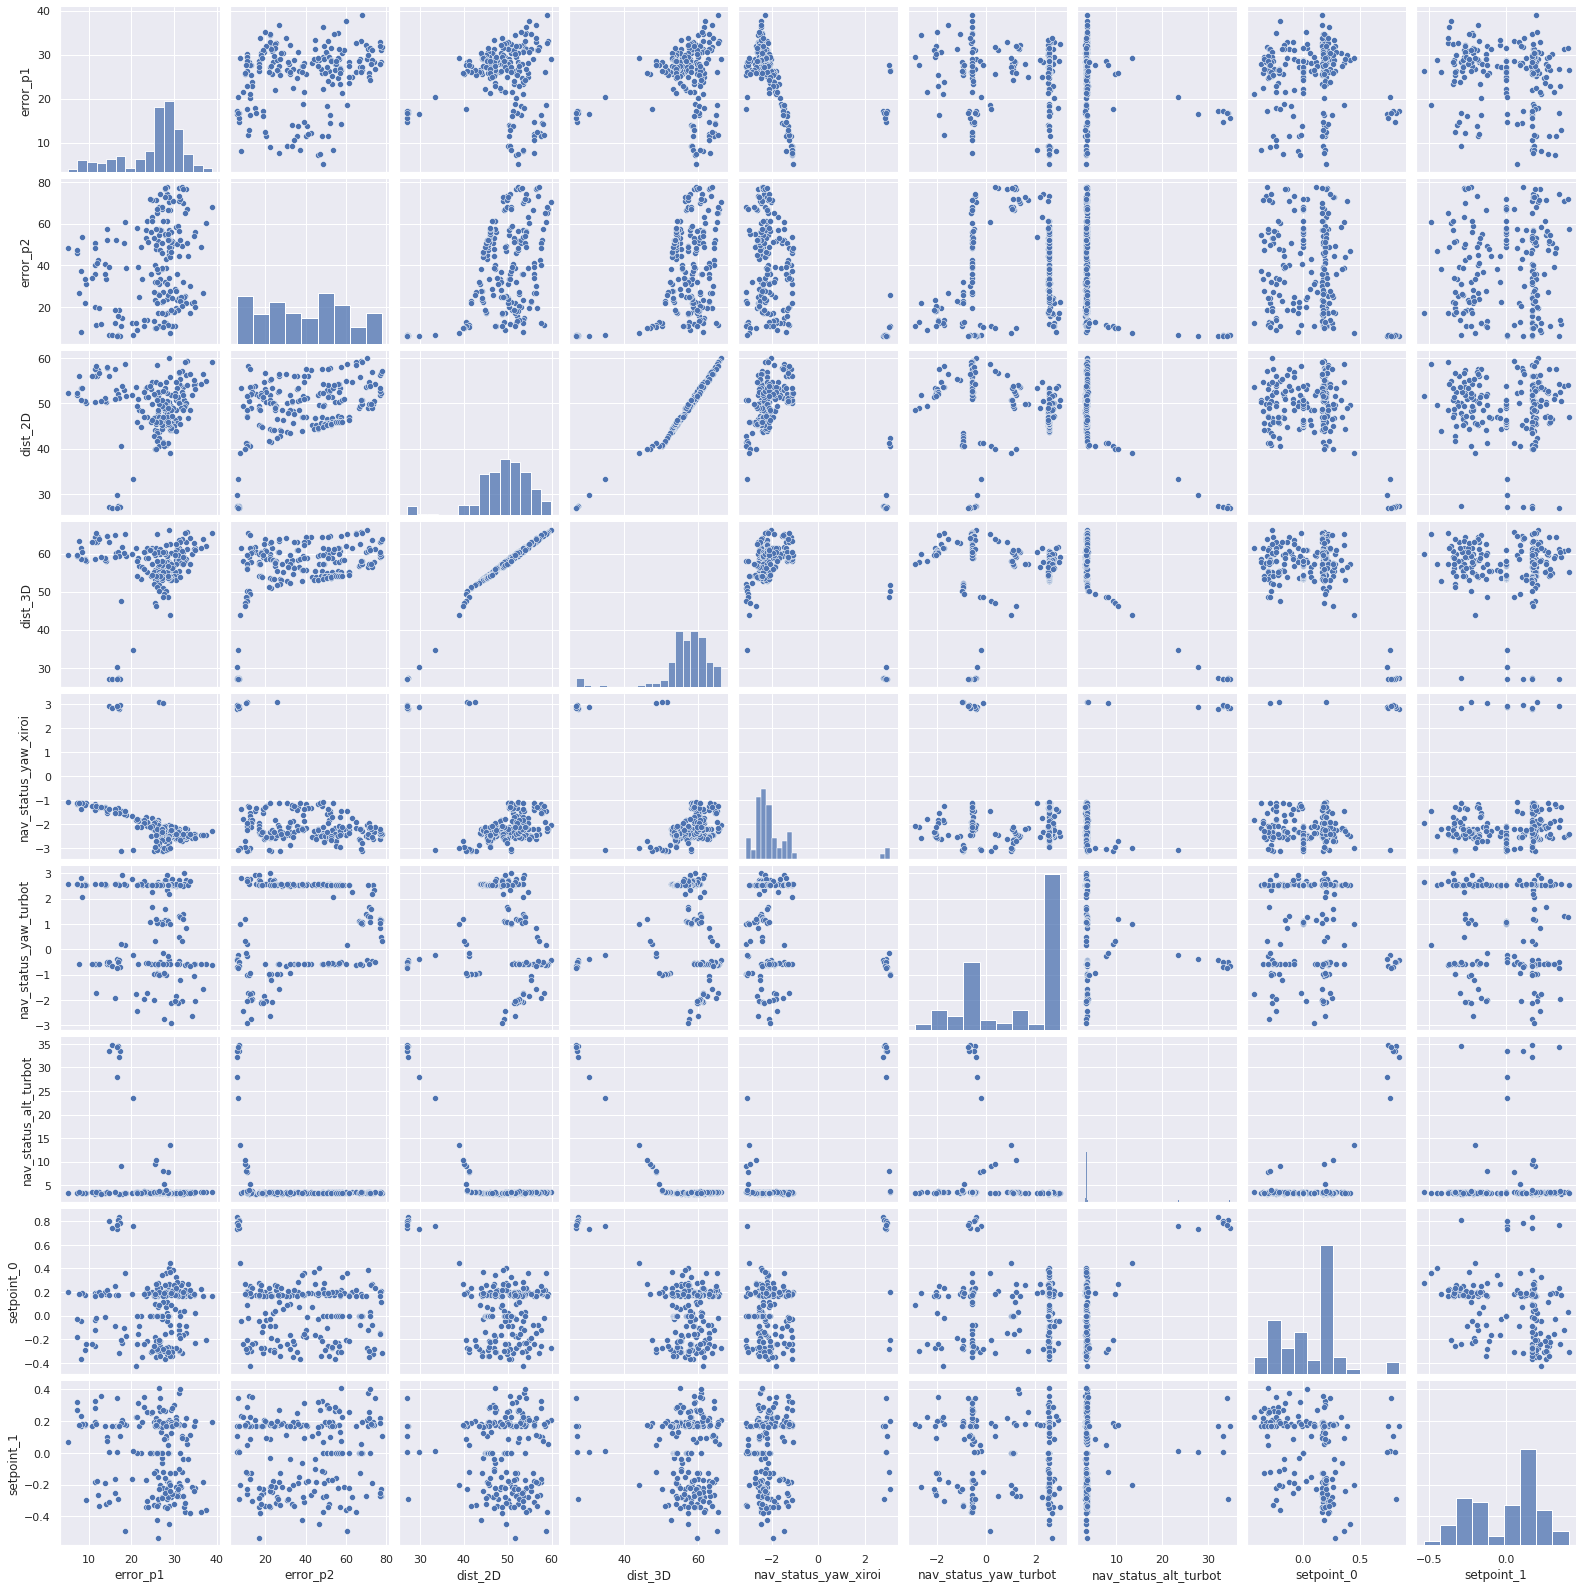

In [16]:
# Error correlation with distance and orientation
nav_corr=nav[['error_p1','error_p2','dist_2D','dist_3D','nav_status_yaw_xiroi','nav_status_yaw_turbot','nav_status_alt_turbot',"setpoint_0","setpoint_1"]]
sns.pairplot(nav_corr)

,error_p1,dist_3D,nav_status_yaw_xiroi
count,210.000000,210.000000,210.000000
mean,25.222931,56.737078,-1.928544
std,7.078063,6.963027,1.197669
min,5.052116,26.963323,-3.118819
25%,22.548538,54.200515,-2.477063
50%,27.288456,57.890281,-2.247102
75%,29.495570,60.538634,-1.812751
max,39.010252,66.198545,3.117677


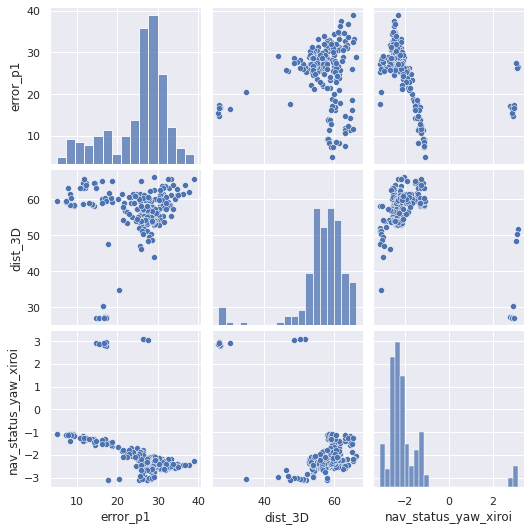

In [17]:
# Error correlation with distance and orientation
nav_corr=nav[['error_p1','dist_3D','nav_status_yaw_xiroi']]
sns.pairplot(nav_corr)
# There is a clear correlation between the usbl error and the xiroi orientation, not that evident but important with the distance
display(nav_corr.describe())

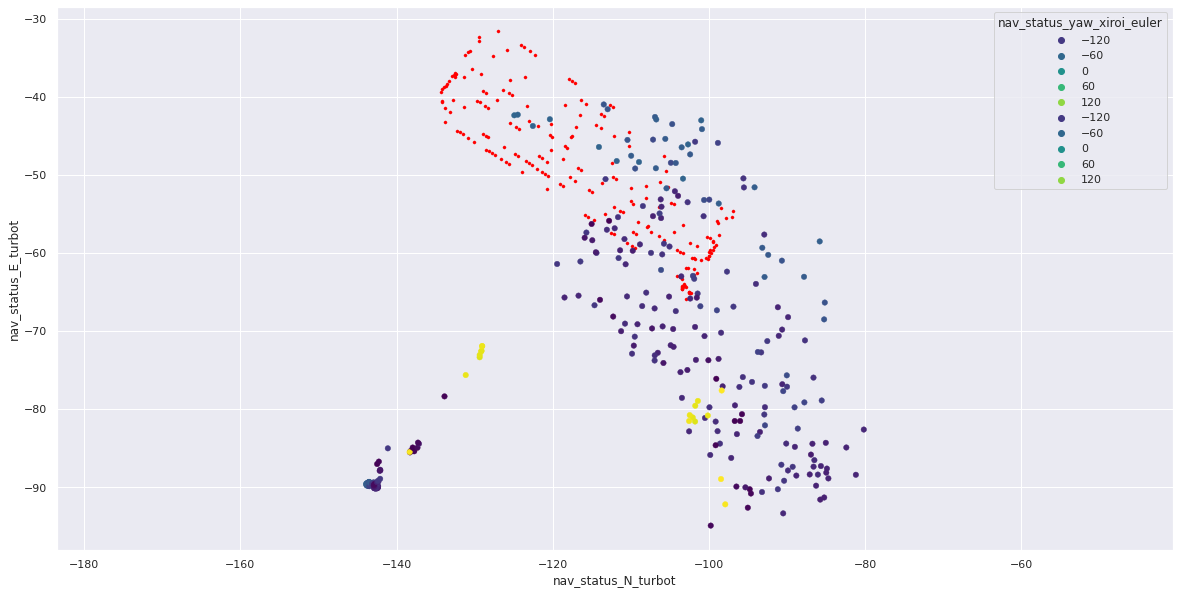

In [18]:
# Lets plot again the localization results, this time color represents the xiroi orientation
sns.set(rc={'figure.figsize':(20,10)})
nav['nav_status_yaw_xiroi_euler'] = nav['nav_status_yaw_xiroi'] *180/np.pi 
fig, ax = plt.subplots()
sns.scatterplot(data=nav,x="nav_status_N_turbot", y="nav_status_E_turbot", hue=None, style=None, edgecolor=None, s=10, ax=ax, color='red')
sns.scatterplot(data=nav,x="p1_N", y="p1_E", hue='nav_status_yaw_xiroi_euler', style=None, edgecolor=None, s=30, ax=ax, palette='viridis')
sns.scatterplot(data=nav,x="nav_status_N_xiroi", y="nav_status_E_xiroi", hue='nav_status_yaw_xiroi_euler', style=None, edgecolor=None, s=30, ax=ax, palette='viridis')
plt.axis('equal')
plt.show()

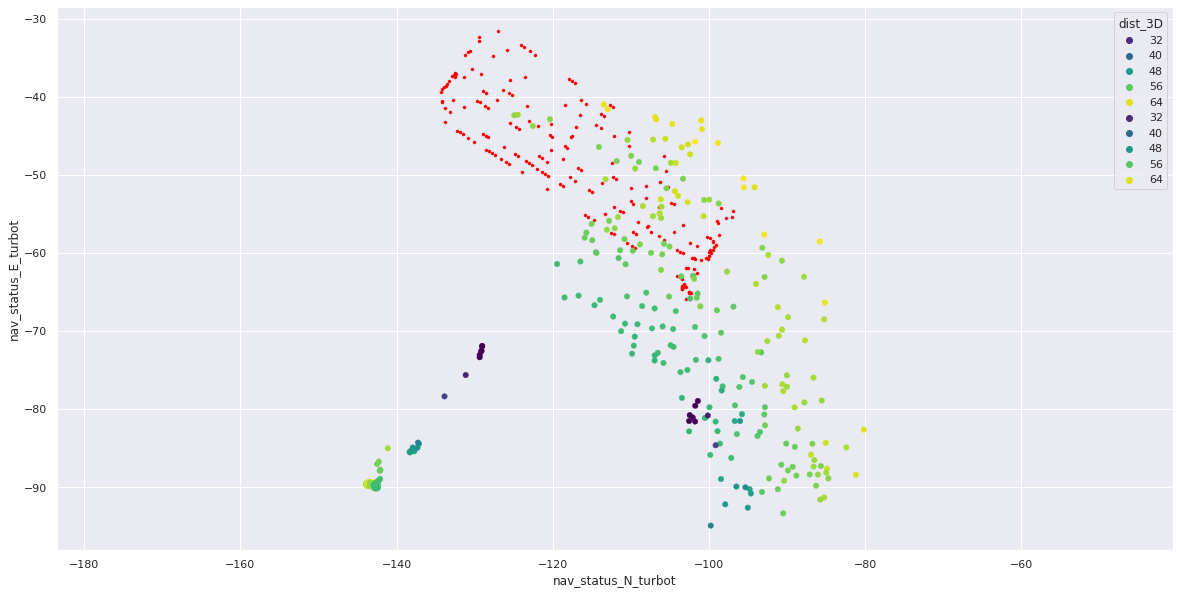

In [19]:
# Lets plot again the localization results, this time color represents the distance
sns.set(rc={'figure.figsize':(20,10)})
nav['nav_status_yaw_xiroi_euler'] = nav['nav_status_yaw_xiroi'] *180/np.pi 
fig, ax = plt.subplots()
sns.scatterplot(data=nav,x="nav_status_N_turbot", y="nav_status_E_turbot", hue=None, style=None, edgecolor=None, s=10, ax=ax, color='red')
sns.scatterplot(data=nav,x="p1_N", y="p1_E", hue='dist_3D', style=None, edgecolor=None, s=30, ax=ax, palette='viridis')
sns.scatterplot(data=nav,x="nav_status_N_xiroi", y="nav_status_E_xiroi", hue='dist_3D', style=None, edgecolor=None, s=30, ax=ax, palette='viridis')
plt.axis('equal')
plt.show()

In [20]:
# Check correlation with setpoints or speeds
# There is a clear correlation with the orientation. However it is not conclusive, we should check the correlation with setpoints or speeds. And check that in other datasets we find the same behavior.
# In case that we confirm this correlation find the cause
# Extract the RSSI values too